# Import libraries

In [1]:
# Import other QSP Notebook functionality
import abm

# Also import other packages
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
import plotnine as p9
%load_ext autoreload
%autoreload 2

rng = np.random.default_rng(seed = 0)

# We use the model defined in the python simulation framework (PSF)
### We load it from a string representation so that the notebook is self-contained

# Experimental data
### We use the experimental data used in the optimization notebook of the simulation framework

In [2]:
data_dict = {'burden': ['low']*15,
             'binding_strength': ['strong']*15,
             'dose_mpk': [1e-05, 2.6826957952797277e-05, 7.196856730011514e-05, 
                          0.0001930697728883, 0.0005179474679231, 0.0013894954943731,
                          0.0037275937203149, 0.01, 0.0268269579527972, 0.0719685673001151,
                          0.1930697728883249, 0.5179474679231213, 1.389495494373136,
                          3.727593720314938, 10.0],
             'time': [172800, 172800, 172800, 172800, 172800, 172800, 172800, 172800, 172800,
                   172800, 172800, 172800, 172800, 172800, 172800],
             'time_unit': ['s']*15,
             'output': ['receptor_occupancy']*15,
             'measurement_unit':[1]*15,
             'constant_error_unit':[1]*15,
             'measurement': [4.876369313215651, 0.0, 2.620206656815801, 5.298750492542093,
                             1.1294688805760742, 4.84735364633005, 0.2600302673093867, 
                             6.627114778619216, 7.691021730300089, 19.47466513971698, 
                             35.854826472199605, 66.0276001226326, 84.94578773212261, 
                             92.18271308177056, 96.28371440189864],
             'constant_error': ['error']*15}

In [3]:
data_table = pd.DataFrame(data_dict)
display(data_table)

,burden,binding_strength,dose_mpk,time,time_unit,output,measurement_unit,constant_error_unit,measurement,constant_error
0,low,strong,0.000010,172800,s,receptor_occupancy,1,1,4.876369,error
1,low,strong,0.000027,172800,s,receptor_occupancy,1,1,0.000000,error
2,low,strong,0.000072,172800,s,receptor_occupancy,1,1,2.620207,error
3,low,strong,0.000193,172800,s,receptor_occupancy,1,1,5.298750,error
4,low,strong,0.000518,172800,s,receptor_occupancy,1,1,1.129469,error
5,low,strong,0.001389,172800,s,receptor_occupancy,1,1,4.847354,error
6,low,strong,0.003728,172800,s,receptor_occupancy,1,1,0.260030,error
7,low,strong,0.010000,172800,s,receptor_occupancy,1,1,6.627115,error
8,low,strong,0.026827,172800,s,receptor_occupancy,1,1,7.691022,error
9,low,strong,0.071969,172800,s,receptor_occupancy,1,1,19.474665,error


# Dose table
### Here we use the information in the data table to define the dose table

In [4]:
dose_table = data_table[['dose_mpk']].copy().drop_duplicates(ignore_index = True)
dose_table['amounts'] = dose_table.dose_mpk
dose_table['amount_unit'] = 'mg/kg'
dose_table['times'] = 0.0
dose_table['time_unit'] = 'd'
dose_table['route'] = 'IV_mpk'

dose_table

,dose_mpk,amounts,amount_unit,times,time_unit,route
0,0.000010,0.000010,mg/kg,0.0,d,IV_mpk
1,0.000027,0.000027,mg/kg,0.0,d,IV_mpk
2,0.000072,0.000072,mg/kg,0.0,d,IV_mpk
3,0.000193,0.000193,mg/kg,0.0,d,IV_mpk
4,0.000518,0.000518,mg/kg,0.0,d,IV_mpk
5,0.001389,0.001389,mg/kg,0.0,d,IV_mpk
6,0.003728,0.003728,mg/kg,0.0,d,IV_mpk
7,0.010000,0.010000,mg/kg,0.0,d,IV_mpk
8,0.026827,0.026827,mg/kg,0.0,d,IV_mpk
9,0.071969,0.071969,mg/kg,0.0,d,IV_mpk


# Check fit to experimental data
### We run a simulation to see how the model fits the experimental data

In [5]:
sim_result = abm.simulate(
    models="sensitivity_plot_example_model.txt", 
    simulations=dose_table["dose_mpk"].to_frame(), 
    parameters="sensitivity_plot_example_parameter_table.csv", 
    doses=dose_table, 
    times=['2.0:d'],
    outputs=["receptor_occupancy"]
).to_pandas(tall_outputs = True)

Total: 0, Running: 0, Succeeded: 0, Failed: 0

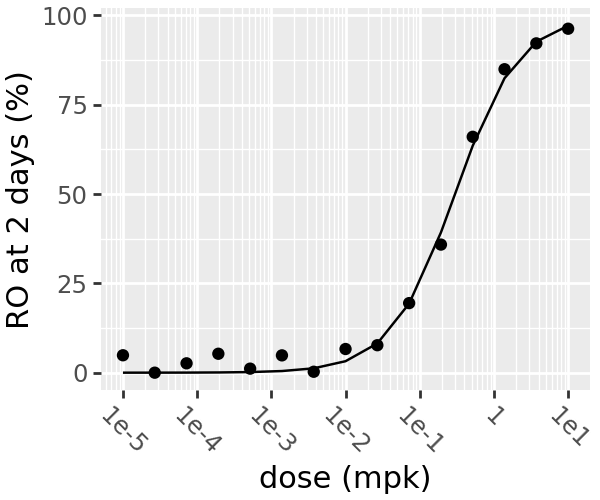

In [6]:
(
    p9.ggplot(mapping = p9.aes(x = 'dose_mpk')) +
    p9.geom_line(data = sim_result, mapping = p9.aes(y = 'value')) +
    p9.geom_point(data = data_table, mapping = p9.aes(y = 'measurement')) +
    p9.scale_x_log10(breaks = 10.0**np.arange(-5,2)) +
    p9.labs(x = 'dose (mpk)', y = 'RO at 2 days (%)') +
    p9.theme(figure_size=(3,2.5), axis_text_x=p9.element_text(rotation=-45))
)

# Sensitivity analysis

In [7]:
# Define the parameters that are going to be analyzed 
pars_to_scan = ["R1_per_cell", "kd_mab", "el_half", "abs_half", "R1_half",
                "Thalf_cytokine_h", "RO50_perc", "ksecrete_max_nmolpercellsec"]

# Define the folds to scan for each parameter
# Note: a fold scan value of 1 should always be
# included to get the simulations with nominal values
folds_to_scan = [1, 50, 0.05]

# We have to initialize the dataframe so that the other
# scans can be added programmatically
all_scans = abm.fold_scan(**{pars_to_scan[0]: folds_to_scan})

# Notice that we start the for loop from the index 1 as
# the previous scan was already added during the 
# initialization in the line above
for p in pars_to_scan[1:]:
    all_scans += abm.fold_scan(**{p: folds_to_scan})

In [8]:
# Run the simulations with the scans
sim_scan_result = abm.simulate(
    models="sensitivity_plot_example_model.txt",
    simulations=dose_table["dose_mpk"].to_frame(), 
    parameters="sensitivity_plot_example_parameter_table.csv", 
    doses=dose_table, 
    times=['2.0:d'],
    scans = all_scans,
    outputs=["receptor_occupancy"]
).to_pandas(tall_outputs = True)

Total: 0, Running: 0, Succeeded: 0, Failed: 0

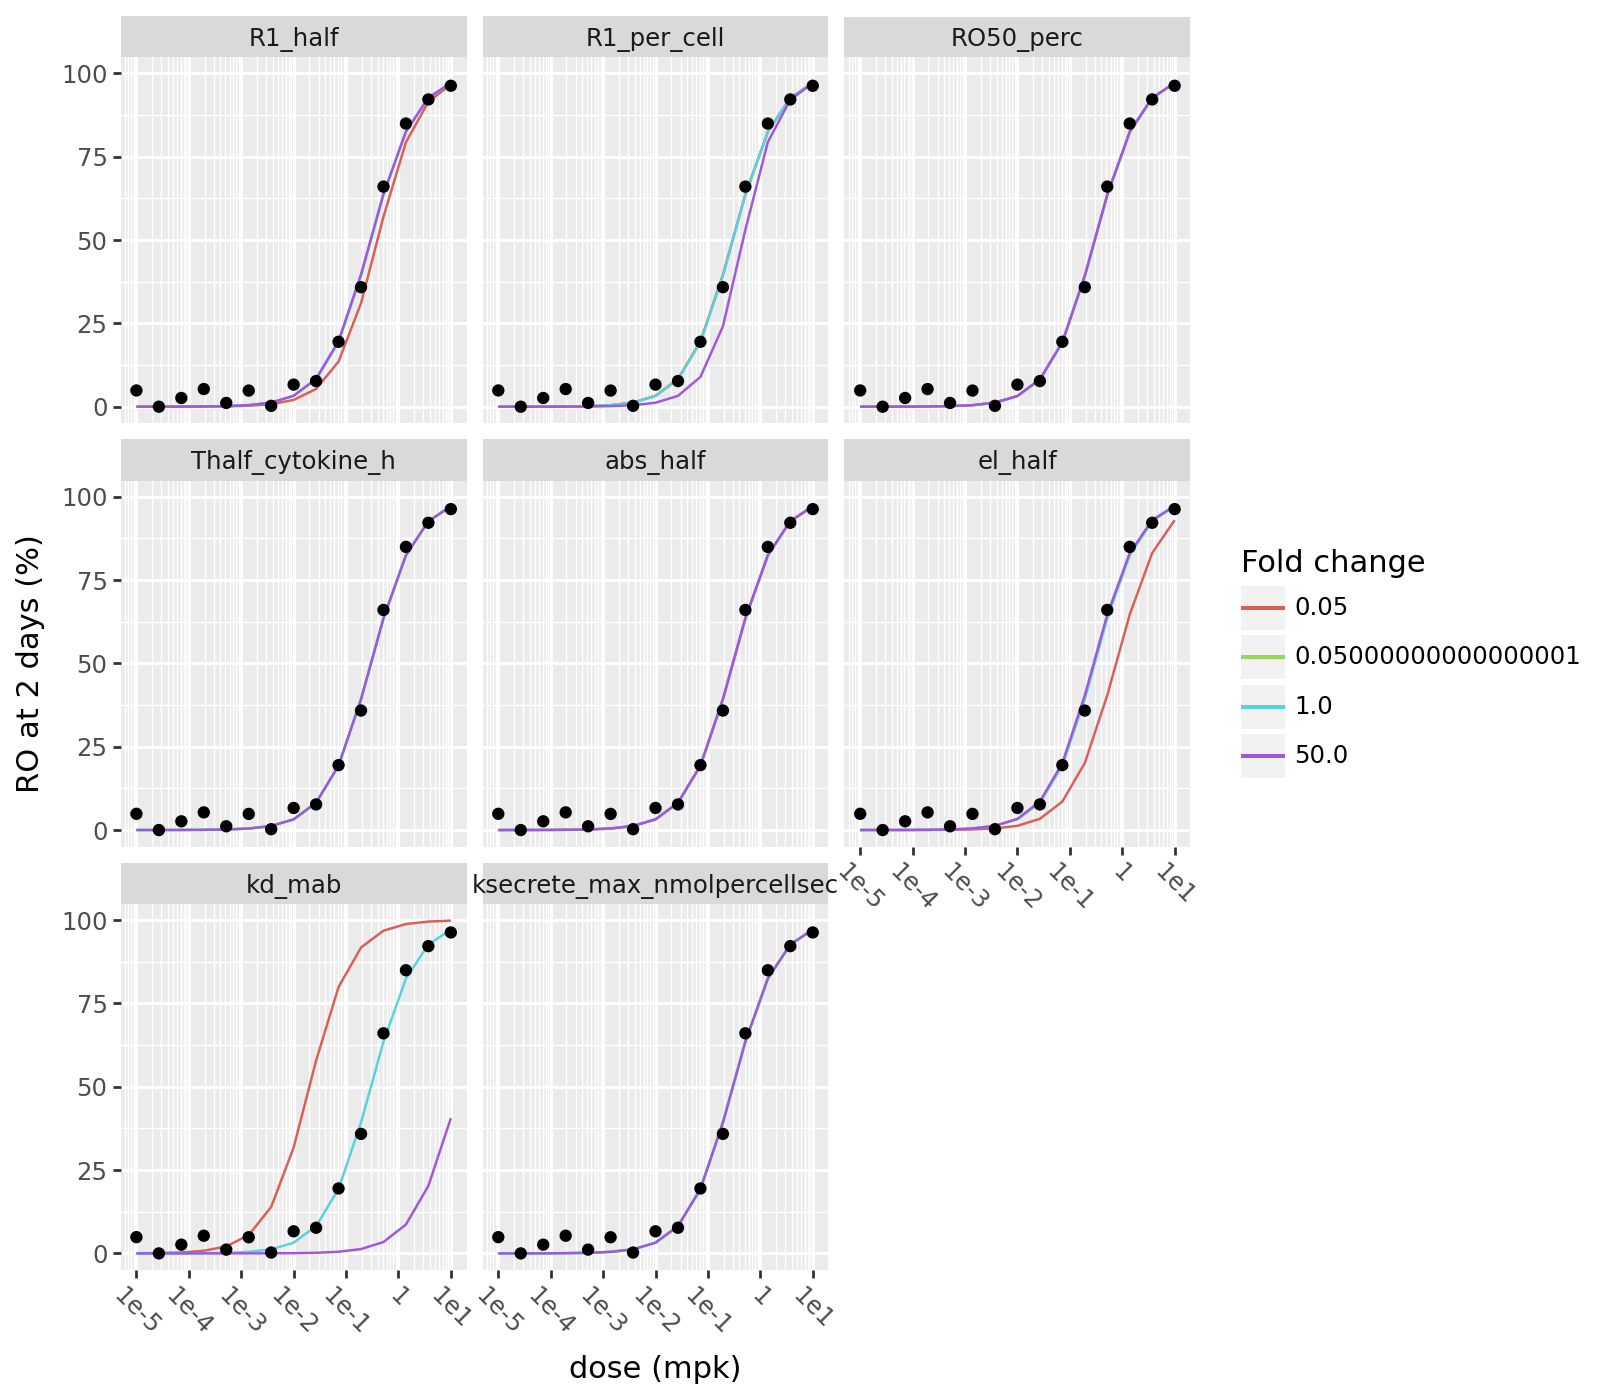

In [9]:
(
    p9.ggplot(mapping = p9.aes(x = 'dose_mpk')) +
    p9.geom_line(data = sim_scan_result, mapping = p9.aes(y = 'value', color="factor(scan_0_fold)")) +
    p9.geom_point(data = data_table, mapping = p9.aes(y = 'measurement')) +
    p9.facet_wrap("~ param_scan_0") +
    p9.scale_x_log10(breaks = 10.0**np.arange(-5,2)) +
    p9.labs(x = 'dose (mpk)', y = 'RO at 2 days (%)', color="Fold change") +
    p9.theme(figure_size=(8,7), axis_text_x=p9.element_text(rotation=-45))
)